In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings('ignore')

## EDA

In [3]:
# Read CSV Data
data = pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# number of row's and col in data set 
row,col=data.shape
print("Number of Row's in Data :",row)
print("Number of Col's in Data :",col)

Number of Row's in Data : 768
Number of Col's in Data : 9


In [6]:
# Check for duplicates and remove them if found
if data.duplicated().sum() > 0:
    print("Found duplicate rows. Removing them...")
    data = data.drop_duplicates()

In [7]:
# Check for missing values
missing_values = data.isna().sum()
if missing_values.any():
    print(f"Missing values found in {missing_values.index.tolist()}. Consider imputation techniques.")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Visualization

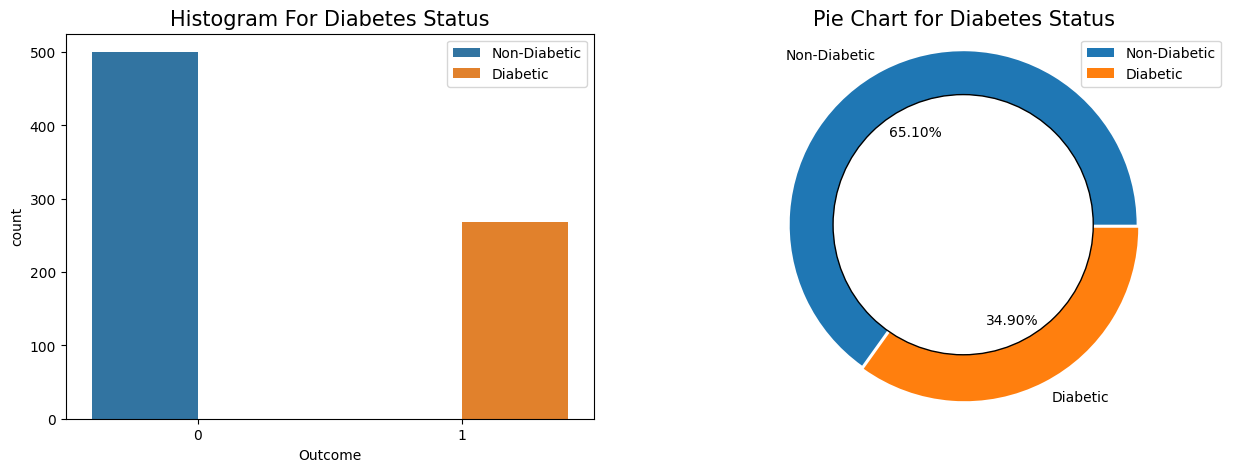

In [11]:
# Plotting For Diabetes Status
labels = ['Non-Diabetic', 'Diabetic']
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Outcome', hue='Outcome', alpha=1)
plt.legend(labels)
plt.title('Histogram For Diabetes Status', size=15)

plt.subplot(1, 2, 2)  
y = data['Outcome'].value_counts()
explode = [0, 0.02]  
plt.pie(y, labels=labels, explode=explode, autopct='%.2f%%')
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Pie Chart for Diabetes Status', size=15)
plt.show()

By observing the charts, we can confirm that the dataset contains a higher proportion of Non-Diabetic patients (500, corresponding to 65.10% as displayed on the chart) compared to Diabetic patients (268, corresponding to 34.90%). This initial exploration highlights a potential class imbalance within the data

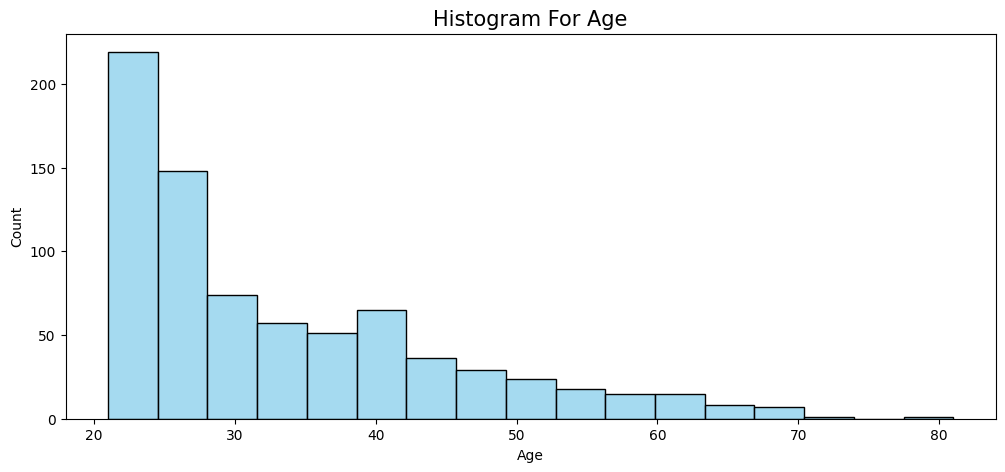

In [12]:
plt.figure(figsize=(12,5))
sns.histplot(data['Age'],kde=False,color='skyblue')
plt.title('Histogram For Age', size=15)
plt.show()

By observing the histogram, we can see a right-skewed distribution. The x-axis represents age groups, and the y-axis indicates the number of patients in each age group. This skewness suggests a higher concentration of individuals in younger age groups, particularly between 21 and 28 years old. The number of patients seems to decrease in older age categories

In [13]:
# Function for Stacked Histograms with Outcome Coloring
def plot_stacked_histograms(data, features, figsize=(15, 12)):
 
  num_features = len(features)
  num_rows = (num_features + 3) // 3  

  plt.figure(figsize=figsize)
  for i, feature in enumerate(features):
    row_num = (i // 3) + 1  
    col_num = (i % 3) + 1  

    plt.subplot(num_rows, 3, (row_num - 1) * 3 + col_num)
    sns.histplot(data=data, x=feature, hue="Outcome", multiple="stack", kde=True)
    plt.title(f"{feature} by Outcome")  

  plt.tight_layout()
  plt.show()

## Visualization Feature Distributions by Outcome

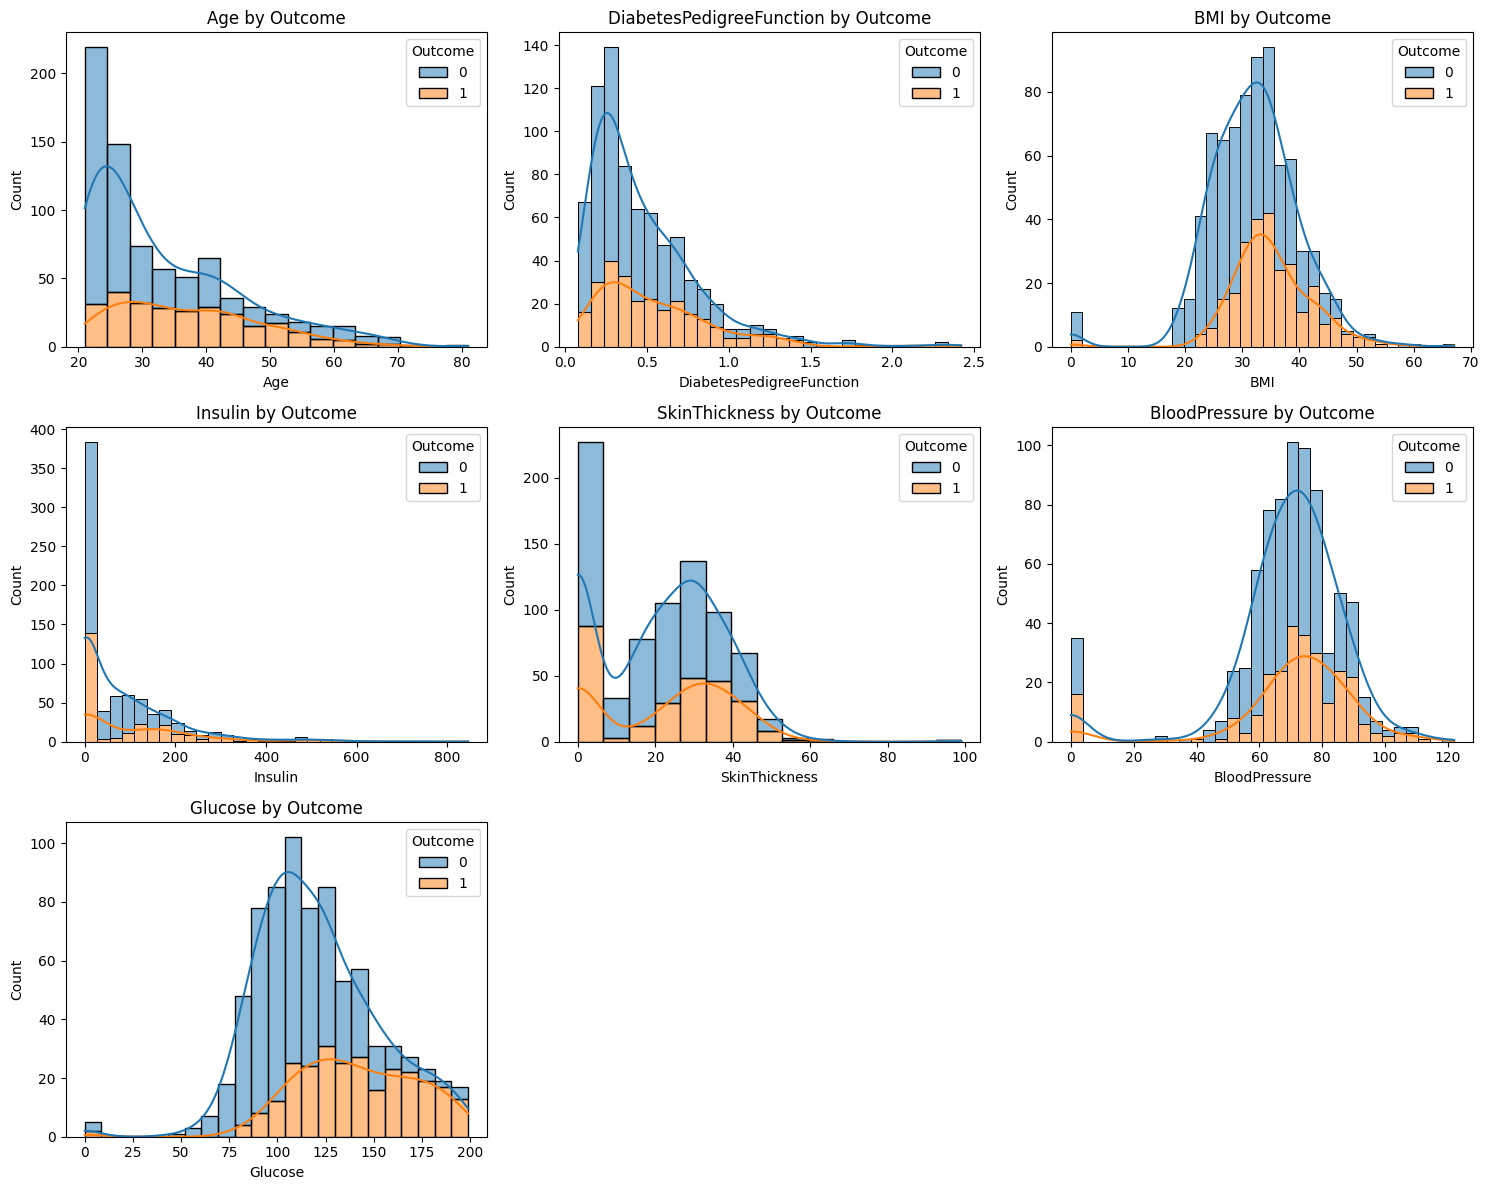

In [14]:
# Calling the function with our data and list of features
features = ['Age', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 
            'SkinThickness', 'BloodPressure', 'Glucose']
plot_stacked_histograms(data, features)

This section employs stacked histograms to visually represent the distribution of various features within the dataset. Each histogram is overlaid with different colors to distinguish between patients classified as diabetic and non-diabetic.¶
By analyzing these stacked histograms, we can observe how the distribution of each feature (e.g., 'Age', 'BMI') varies across the two outcome groups. This visualization technique allows us to identify potential patterns or relationships between feature values and the presence or absence of diabetes.

In [15]:
# Function for scatter plot to show the distribution of the age VS other features
def plot_scatter_age_distribution(data, features, figsize=(10, 30)):
   
    num_features = len(features)
    num_rows = num_features 

    plt.figure(figsize=figsize)
    for i, feature in enumerate(features):
        plt.subplot(num_rows, 1, i + 1)  
        sns.scatterplot(data=data, x=feature, y="Age")  
        plt.title(f"Age Distribution VS {feature}")

    plt.tight_layout()
    plt.show()

### Visualizing Feature Distributions by Age:

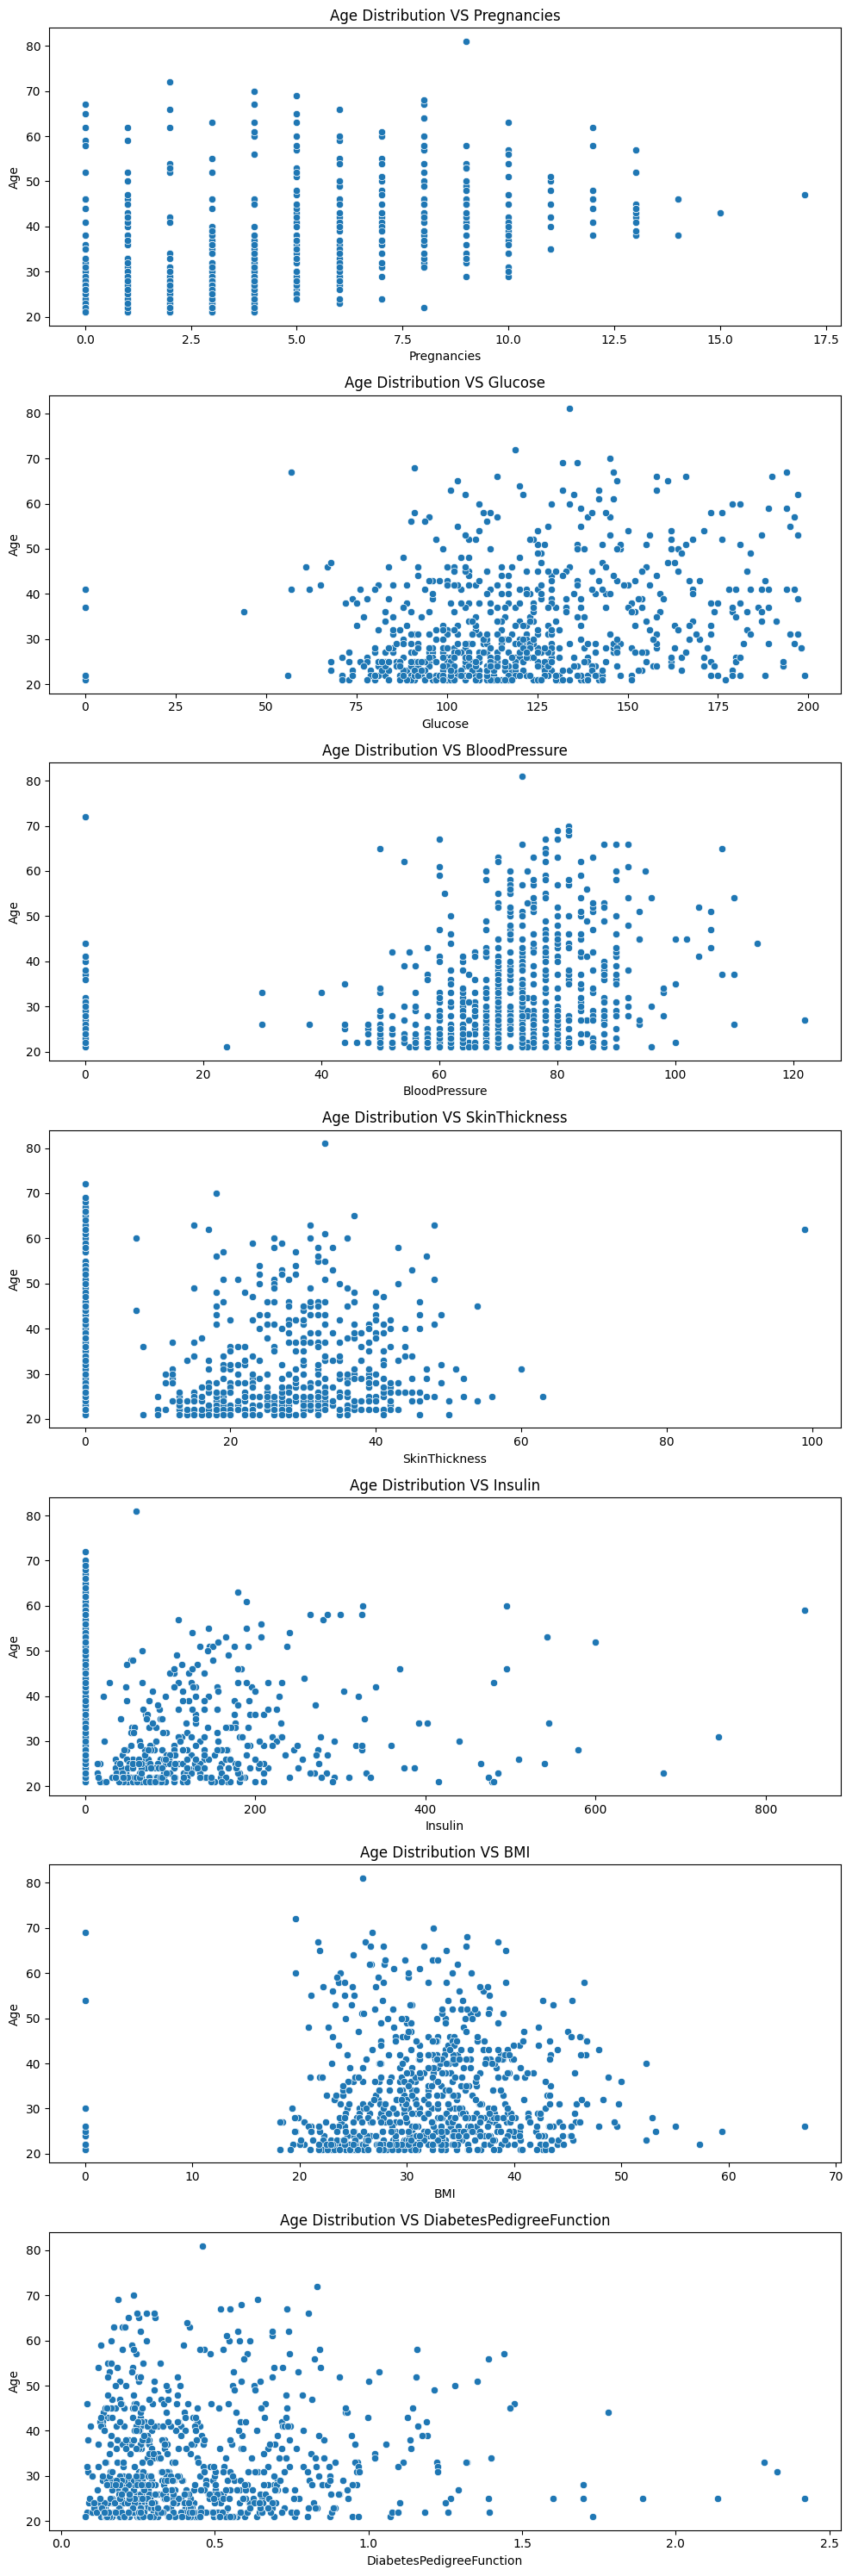

In [16]:
# Calling the function with our data and list of features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction']  
plot_scatter_age_distribution(data, features)

Here, we can observe the relationships between age and various features in the dataset using scatter plots. These plots allow us to visualize how age is distributed for different values of each feature. For instance, the scatter plot for 'BloodPressure' might reveal if there's a trend of higher or lower blood pressure at different age groups.
By analyzing these scatter plots, we can gain insights into potential correlations or patterns between age and other health factors

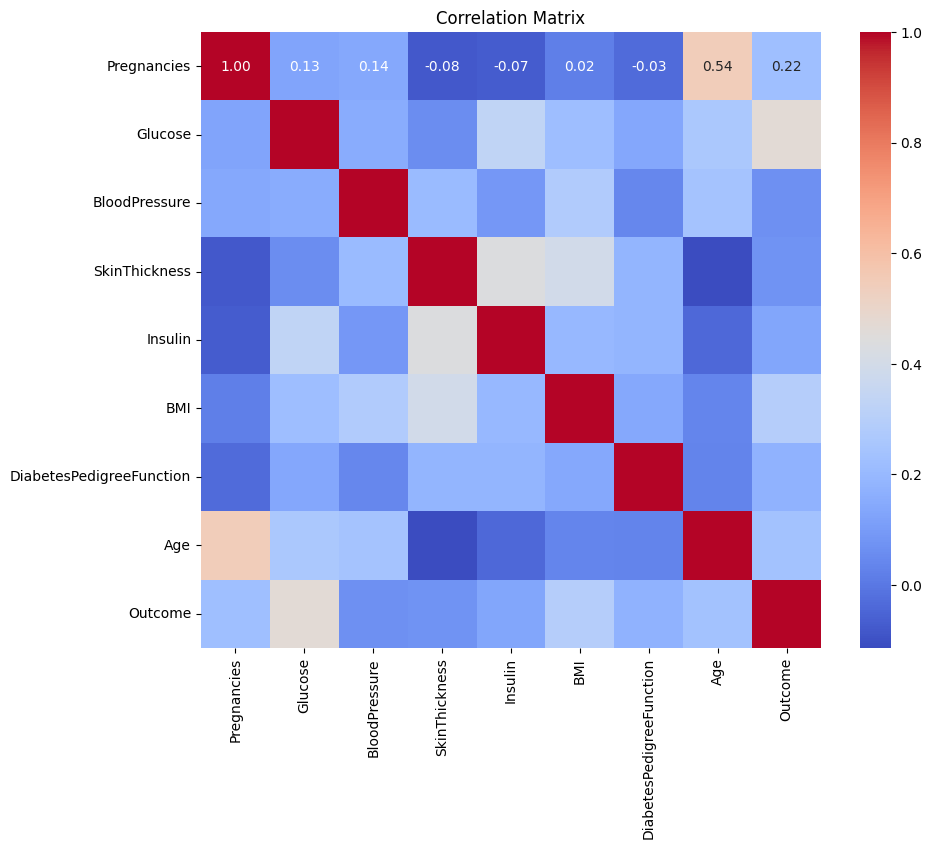

In [17]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Training And Testing Sets

In [18]:
# Splitting Features and Target Variable
y = data['Outcome'] # Depended
x = data.drop('Outcome', axis=1) # independents

In [19]:
# Splitting Data for Training and Testing:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Feature Scaling

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
print('Length of Training Set :',len(x_train))
print('Length of Testing Set :',len(x_test))

Length of Training Set : 614
Length of Testing Set : 154


# Model Execution
## K- Nearest Neighbors (KNN)

In [22]:
k_values = [i for i in range (1,40)]
scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_model, x, y, cv=10)
    scores.append(np.mean(score))

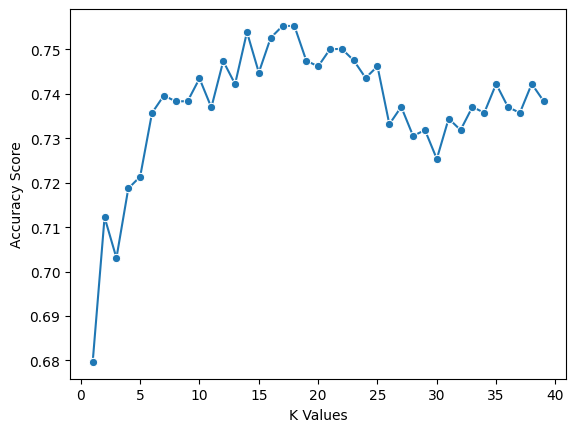

In [23]:
# Visualize K vs Accuracy
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

In [24]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

## Model Evaluation

In [25]:
y_pred = knn_model.predict(x_test) 
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.8116883116883117

In [26]:
# Evaluate The Model
Training_score = accuracy_score(y_train, knn_model.predict(x_train))  
Testing_score = accuracy_score(y_test, y_pred)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Classification Report
class_names = ['Non-Diabetic', 'Diabetic']  
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# Print the relevant metrics
print('Training Score (Accuracy):', Training_score)
print('Testing Score (Accuracy):', Testing_score)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

# Print detailed Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=class_names))

Training Score (Accuracy): 0.7736156351791531
Testing Score (Accuracy): 0.8116883116883117
Precision: 0.725
Recall: 0.6170212765957447
F1-Score: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.84      0.90      0.87       107
    Diabetic       0.72      0.62      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



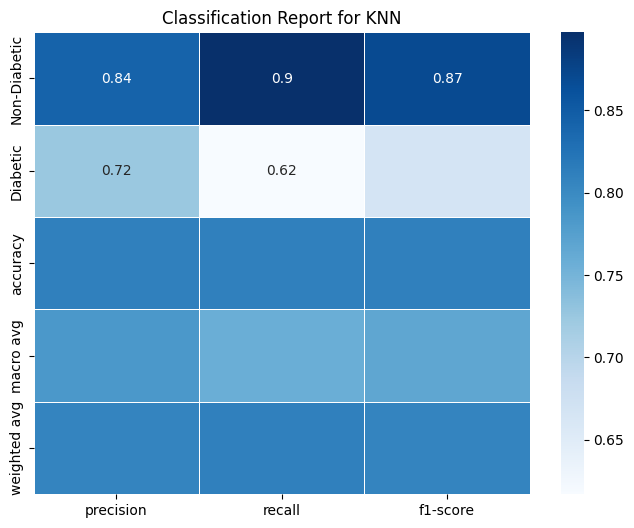

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', linewidths=.5)
plt.title('Classification Report for KNN')
plt.show()

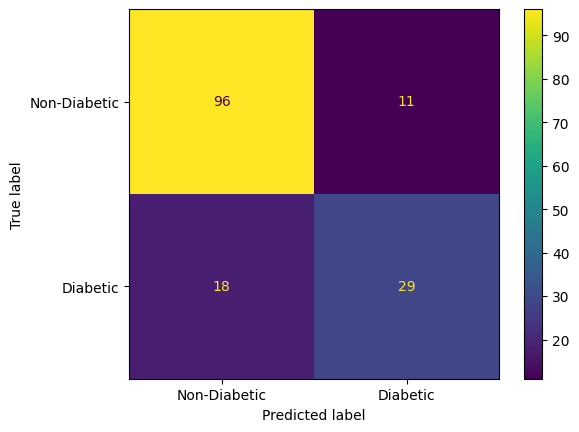

In [28]:
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Non-Diabetic", "Diabetic"])
cm_display.plot()
plt.show()